In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-eats-usa-restaurants-menus/restaurants.csv
/kaggle/input/uber-eats-usa-restaurants-menus/restaurant-menus.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
from wordcloud import WordCloud

In [3]:
data = pd.read_csv("/kaggle/input/uber-eats-usa-restaurants-menus/restaurants.csv")

In [4]:
df=pd.read_csv("/kaggle/input/uber-eats-usa-restaurants-menus/restaurant-menus.csv")

In [5]:
data.head(10)

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700
5,6,75,Ocean Restaurant,NaN,NaN,"Seafood, Sushi, Steak",$$,"1218 20th Street South, Birmingham, AL, 35205",35205,33.498630,-86.795740
6,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440
7,8,26,Little India,NaN,NaN,"Vegetarian, Asian, Asian Fusion, Chinese, Indi...",$,"2236 Highland Ave, Birmingham, AL, 35205",35205,33.502259,-86.790298
8,9,136,Captain D's (1284 Decatur Hwy),NaN,NaN,"Seafood, Fast Food, Fish and Chips, American",$,"1284 Decatur Hwy, Gardendale, AL, 35071",35071,33.657100,-86.811970
9,10,51,Cajun Bistro Express,NaN,NaN,"Desserts, Vegetarian, Coffee and Tea",$,"1515 Pearson Ave SW, Birmingham, AL, 35211",35211,33.486840,-86.856300


In [6]:
data.tail()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
40222,40223,54,Mangia la pasta! (5610 N Interstate Hwy 35),4.8,500.0,"Pasta, Comfort Food, Italian, Group Friendly",$,"5610 N I35, Austin, TX, 78751",78751,30.316248,-97.708441
40223,40224,53,Wholly Cow Burgers (S Lamar),4.6,245.0,"American, Burgers, Breakfast and Brunch, Aller...",$,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.242816,-97.783821
40224,40225,52,EurAsia Ramen 3,4.7,293.0,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",$,"5222 Burnet Road, Austin, TX, 78756",78756,30.324290,-97.740200
40225,40226,51,Austin's Habibi (5th St),4.7,208.0,"Mediterranean, Gluten Free Friendly, Allergy F...",$$,"817 W 5th St, Austin, TX, 78703",78703,30.269580,-97.753110
40226,40227,50,Beijing Wok,4.4,254.0,"Chinese, Asian, Asian Fusion, Family Friendly,...",$,"8106 Brodie Ln, Austin, TX, 78749",78749,30.202210,-97.838689


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40227 entries, 0 to 40226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            40227 non-null  int64  
 1   position      40227 non-null  int64  
 2   name          40227 non-null  object 
 3   score         22254 non-null  float64
 4   ratings       22254 non-null  float64
 5   category      40204 non-null  object 
 6   price_range   33581 non-null  object 
 7   full_address  39949 non-null  object 
 8   zip_code      39940 non-null  object 
 9   lat           40227 non-null  float64
 10  lng           40227 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 3.4+ MB


In [8]:
df.head(10)

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD
5,1,Extra Large Pizza,Extra Large Pepperoni Slice,Slice.,3.99 USD
6,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon Slice,NaN,3.99 USD
7,1,Extra Large Pizza,Extra Large Meat Lovers Slice,Slice.,3.99 USD
8,1,Extra Large Pizza,Extra Large Supreme Slice,Slice.,3.99 USD
9,1,Extra Large Pizza,Extra Large 5 Cheese Slice,Slice.,3.99 USD


In [9]:
data.shape

(40227, 11)

In [10]:
data.describe()

,id,position,score,ratings,lat,lng
count,40227.000000,40227.000000,22254.000000,22254.000000,40227.000000,40227.000000
mean,20114.000000,79.529843,4.560996,74.870989,39.927033,-96.549713
std,11612.678976,77.611449,0.298041,72.381529,5.765774,17.961361
min,1.000000,1.000000,1.300000,10.000000,0.000000,-123.841240
25%,10057.500000,14.000000,4.400000,25.000000,37.082007,-113.587301
50%,20114.000000,51.000000,4.600000,51.000000,39.000990,-96.587547
75%,30170.500000,129.000000,4.800000,100.000000,45.493640,-77.528825
max,40227.000000,300.000000,5.000000,500.000000,48.963950,0.000000


In [11]:
data.drop_duplicates(["id"],keep='first',inplace=True)
data.shape

(40227, 11)

In [12]:
data.isnull().sum()

id                  0
position            0
name                0
score           17973
ratings         17973
category           23
price_range      6646
full_address      278
zip_code          287
lat                 0
lng                 0
dtype: int64

In [13]:
data["category"].unique()

array(['Burgers, American, Sandwiches',
       'Coffee and Tea, Breakfast and Brunch, Bubble Tea',
       'American, Cheesesteak, Sandwiches, Alcohol', ...,
       'American, Burgers, Breakfast and Brunch, Allergy Friendly, Family Meals, Vegan, Vegan Friendly, Sandwiches, Desserts, Comfort Food, Soup, Cheesesteak, Everyday Essentials, Group Friendly',
       'Sushi, Asian, Japanese, Exclusive to Eats, Group Friendly',
       'Mediterranean, Gluten Free Friendly, Allergy Friendly, Family Meals, Turkish, Greek, Middle Eastern, Salads, Vegan Friendly, Vegetarian Friendly, Local Specialities'],
      dtype=object)

In [14]:
print(data["category"].unique()[0])
print(type(data["category"].unique()[0]))

Burgers, American, Sandwiches
<class 'str'>


In [15]:
# Removing [' '] from each value
#print(data["category"].unique()[0])
#data["category"] = data["category"].apply(lambda x:x[2:-2])
#print(data["category"].unique()[0])

# Changing ''  to 'NA'
#print(data["category"].unique())
#data["category"] = data["category"].apply(lambda x : np.where(x=="", "NA", x))
#print(data["category"].unique())

In [16]:
outlets = data["name"].value_counts()

In [17]:
outlets

The Ice Cream Shop                  107
The Ice Cream Shop                   44
Everyday Needs by Gopuff             26
Kung Fu Tea                          23
Pollo Regio                          16
                                   ... 
El Muchacho Alegre                    1
Taqueria La Jarochita                 1
Med Mix                               1
MrBeast Burger (1085 Lake Drive)      1
Beijing Wok                           1
Name: name, Length: 38863, dtype: int64

In [18]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [19]:
chains

The Ice Cream Shop              107
The Ice Cream Shop               44
Everyday Needs by Gopuff         26
Kung Fu Tea                      23
Pollo Regio                      16
                               ... 
Pat's Barbecue                    2
The Chinese Snob                  2
Duck Duck Goose                   2
Los 2 Potrillos                   2
Eno Vino Wine Bar and Bistro      2
Name: name, Length: 769, dtype: int64

In [20]:
print("Total Restaurants = ", data.shape[0])
print("Total Restaurants that are part of some chain = ", data.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((data.shape[0] - single.shape[0]) / data.shape[0],2)*100, "%")

Total Restaurants =  40227
Total Restaurants that are part of some chain =  2133
Percentage of Restaurants that are part of a chain =  5.0 %


In [21]:
chains.head(10)

The Ice Cream Shop          107
The Ice Cream Shop           44
Everyday Needs by Gopuff     26
Kung Fu Tea                  23
Pollo Regio                  16
Panera Bread                 12
Freaking Good Pizza          12
China Wok                    12
Tudor's Biscuit World        12
China Express                10
Name: name, dtype: int64

In [22]:
top10_chains = data["name"].value_counts()[:10].sort_values(ascending=True)

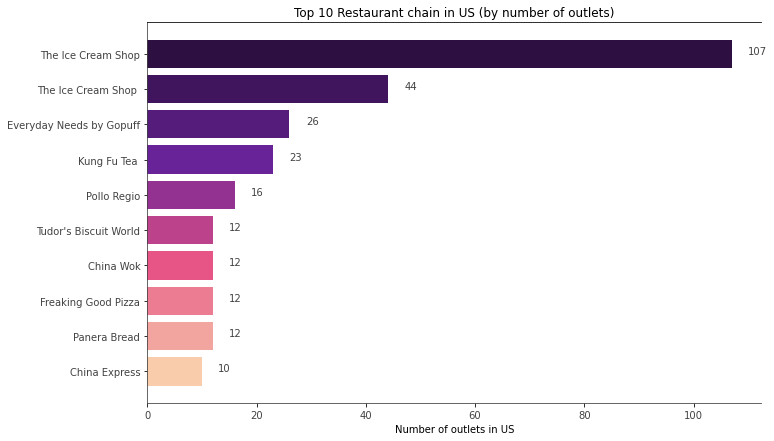

In [23]:
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)
 
plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in US")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in US (by number of outlets)")


plt.show()

In [24]:
outlets = data["name"].value_counts()

In [25]:
atleast_5_outlets = outlets[outlets > 4]

In [26]:
top10_chains2 = data[data["name"].isin(atleast_5_outlets.index)].groupby("name").mean()["ratings"].sort_values(ascending=False)[:10].sort_values(ascending=True)

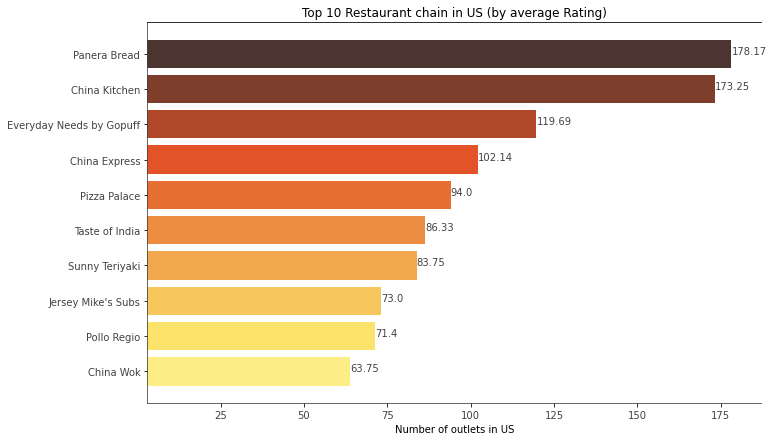

In [27]:
height = pd.Series(top10_chains2.values).map(lambda x : np.round(x, 2))
bars = top10_chains2.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#fded86', '#fce36b', '#f7c65d', '#f1a84f', '#ec8c41', '#e76f34', '#e25328', '#b04829', '#7e3e2b', '#4c3430']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in US")

for i, v in enumerate(height):
    ax.text(v + 0.01, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in US (by average Rating)")


plt.show()

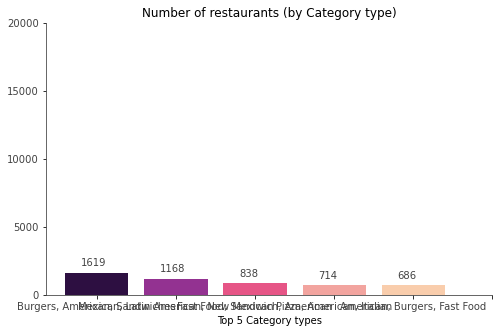

In [28]:
cat_count = data.groupby("category").count()["id"].sort_values(ascending=False)[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(cat_count.index, cat_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 Category types")

for i, v in enumerate(cat_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by Category type)")


plt.show()

In [29]:
rating_by_cat = data.groupby("category").mean()["ratings"].sort_values(ascending=False)[:10]
rating_by_cat

category
Thai, Asian, Noodles, Family Friendly, Group Friendly, Alcohol                                                                 500.0
Chinese, Asian, Asian Fusion, Group Friendly, Alcohol                                                                          500.0
Pizza, Wings, Mediterranean, Halal, Sandwich, Black-owned, Chicken, Vegetarian Friendly, Healthy, Group Friendly               500.0
Sushi, Asian, Allergy Friendly                                                                                                 500.0
American, Chicken, Fried Chicken, Wings, Salads, Desserts, Family Friendly, Family Meals, Kids Friendly, Local Specialities    500.0
Asian, Thai, Noodles, Group Friendly                                                                                           500.0
Breakfast and Brunch, Salads, Sandwich, Healthy, Family Friendly, Group Friendly                                               500.0
American, Noodles, Jewish, Soup, Healthy                    

In [30]:
data.groupby("category").mean()["position"].sort_values(ascending=False)[:10]

category
Burgers, Japanese, Japanese BBQ, Steak, Pasta, Seafood                        300.0
Mexican, American, Breakfast and Brunch                                       300.0
Mediterranean, Kebab, Chicken                                                 300.0
Thai, Vegetarian, Asian                                                       300.0
Mediterranean, Moroccan, Sandwich                                             300.0
Salads, Sandwich, Family Meals, Healthy, Latin American, Peruvian, Chicken    300.0
Black-owned, Thai, Noodles, Rice &amp; Curry                                  299.0
Japanese: Sushi, Family Friendly                                              299.0
Chinese, Bakery, Desserts                                                     299.0
Rolls, Seafood, Asian                                                         299.0
Name: position, dtype: float64

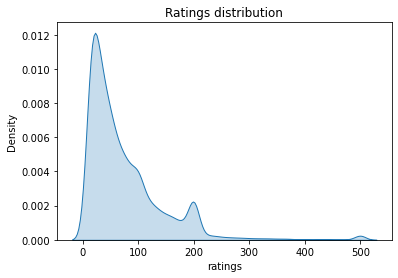

In [31]:
sns.kdeplot(data['ratings'], shade=True)
plt.title("Ratings distribution")
plt.show()
